In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# import Libraries

In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the stacking model

In [ ]:
stacking= pickle.load( open( "/content/drive/MyDrive/stacking1.P", "rb" ) )

# load TF-IDF model

In [ ]:
Tfidf = pickle.load( open( "/content/drive/MyDrive/Tf_Idf.P", "rb" ) )
tfidfemotion= pickle.load( open('/content/drive/MyDrive/emotion_tfidf.P', "rb" ) )
rf=pickle.load( open('/content/drive/MyDrive/rf.P', "rb" ) )

In [ ]:
label=['anger','fear','love','joy','sadness','surprise']

# Enter the data files' paths

In [ ]:
'/content/drive/MyDrive/mvp/BMW1.csv_sentiment.csv','/content/drive/MyDrive/mvp/KIA .csv_sentiment.csv','/content/drive/MyDrive/mvp/hyundai.csv_sentiment.csv','/content/drive/MyDrive/mvp/mercedes .csv_sentiment.csv','/content/drive/MyDrive/mvp/peugeot .csv_sentiment.csv'

('/content/drive/MyDrive/mvp/BMW1.csv_sentiment.csv',
 '/content/drive/MyDrive/mvp/KIA .csv_sentiment.csv',
 '/content/drive/MyDrive/mvp/hyundai.csv_sentiment.csv',
 '/content/drive/MyDrive/mvp/mercedes .csv_sentiment.csv',
 '/content/drive/MyDrive/mvp/peugeot .csv_sentiment.csv')

In [ ]:
docs=['BMW1.csv_sentiment.csv','KIA .csv_sentiment.csv','hyundai.csv_sentiment.csv','mercedes .csv_sentiment.csv','peugeot .csv_sentiment.csv']


In [ ]:
for doc in docs:
    path='/content/drive/MyDrive/mvp/'+ doc
    #read the data
    df =pd.read_csv(path,dtype='string',error_bad_lines=False)
    df = df[df['clean_text'] != '<NA>']
    df.reset_index(inplace=True,drop=True) 
    tf_emotion=tfidfemotion.transform(df['clean_text'])
    emotion=rf.predict(tf_emotion)
    emotion_proba=rf.predict_proba(tf_emotion)
    emotion=[]
    for i in range(len(emotion_proba)):
        if df['sentiment'].iloc[i] == 'neutral' :
           emotion.append('neutral')
        elif df['sentiment'].iloc[i] == 'negative' : 
            maxx=np.argmax([emotion_proba[i][0],emotion_proba[i][1],0,0,emotion_proba[i][4],0])
            emotion.append(label[maxx])
        else :
          maxx=np.argmax([0,0,emotion_proba[i][2],emotion_proba[i][3],0,emotion_proba[i][5]])
          emotion.append(label[maxx])

    #save the prediction in the data frame
    df['emotion']=emotion

    #save the the data in csv file 
    df.to_csv('/content/drive/MyDrive/beta_dina/cars/'+doc,index=False)
    print("done",doc)


done BMW1.csv_sentiment.csv
done KIA .csv_sentiment.csv
done hyundai.csv_sentiment.csv
done mercedes .csv_sentiment.csv
done peugeot .csv_sentiment.csv


In [ ]:
df=df[['clean_text','sentiment','emotion']]

In [ ]:
df[20:30]

,text,sentiment,emotion
20,Can someone please explain to me how to take a...,negative,fear
21,@KareemRifai The United States battled Huawei ...,neutral,neutral
22,@Silent_Kindling The United States battled Hua...,neutral,neutral
23,@BugNymph Oh yeah I heard that was a good phon...,positive,love
24,RT @BenjaminT0001: Corbella: If Trudeau allows...,neutral,neutral
25,RT @HUAWEI_TECH4ALL: Welcome to our official H...,positive,love
26,Cobalt Strike Server Found C2: HTTPS @ 121[.]3...,negative,sadness
27,RT @MariiishIsFine: Reminder as well to suppor...,neutral,neutral
28,RT @Huawei: Analysys Mason Principal Analyst S...,neutral,neutral
29,RT @Huawei: Earlswood Marketing Principal Cons...,positive,love


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


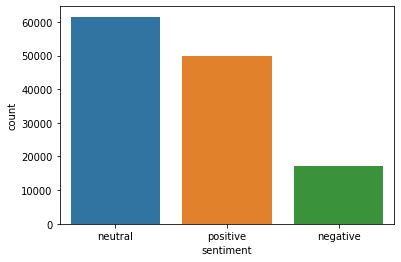

In [ ]:
import seaborn as sns
df =pd.read_csv('/content/drive/MyDrive/beta_dina/companies/huawei.csv',dtype='string',error_bad_lines=False)
sns.countplot(df['sentiment'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


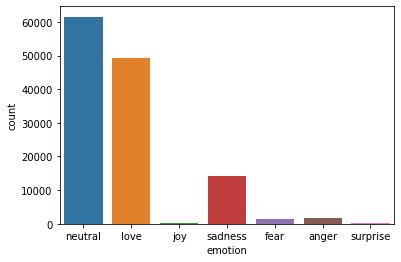

In [ ]:
sns.countplot(df['emotion'])

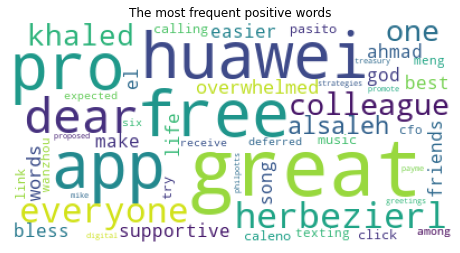

In [ ]:
import wordcloud
wc = wordcloud.WordCloud( background_color='white',    max_words=50 ,     max_font_size=70  )
wc = wc.generate(str(  df.loc[df['sentiment']=='positive']['clean_text'] ))
fig = plt.figure(figsize=(8, 8),num=1)
plt.axis('off')
plt.title('The most frequent positive words')
plt.imshow(wc, cmap=None)
plt.show()

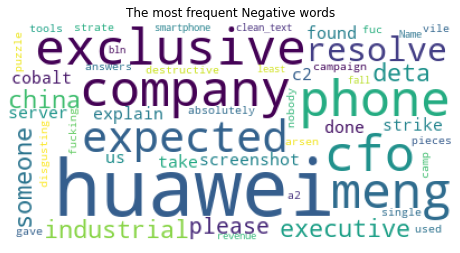

In [ ]:
wc = wordcloud.WordCloud( background_color='white',    max_words=50 ,     max_font_size=70  )
wc = wc.generate(str(  df.loc[df['sentiment']=='negative']['clean_text'] ))
fig = plt.figure(figsize=(8, 8),num=1)
plt.axis('off')
plt.title('The most frequent Negative words')
plt.imshow(wc, cmap=None)
plt.show()

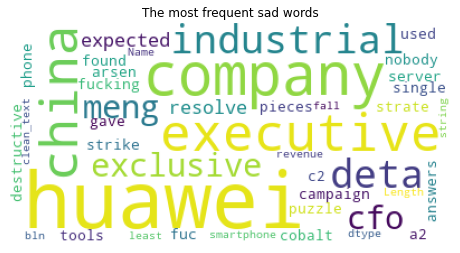

In [ ]:
import wordcloud
wc = wordcloud.WordCloud( background_color='white',    max_words=50 ,     max_font_size=70  )
wc = wc.generate(str(  df.loc[df['emotion']=='sadness']['clean_text'] ))
fig = plt.figure(figsize=(8, 8),num=1)
plt.axis('off')
plt.title('The most frequent sad words')
plt.imshow(wc, cmap=None)
plt.show()

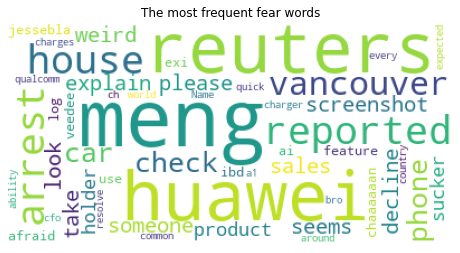

In [ ]:
import wordcloud
wc = wordcloud.WordCloud( background_color='white',    max_words=50 ,     max_font_size=70  )
wc = wc.generate(str(  df.loc[df['emotion']=='fear']['clean_text'] ))
fig = plt.figure(figsize=(8, 8),num=1)
plt.axis('off')
plt.title('The most frequent fear words')
plt.imshow(wc, cmap=None)
plt.show()

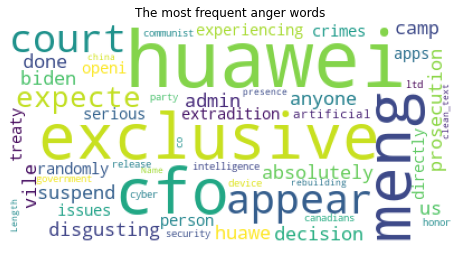

In [ ]:
import wordcloud
wc = wordcloud.WordCloud( background_color='white',    max_words=50 ,     max_font_size=70  )
wc = wc.generate(str(  df.loc[df['emotion']=='anger']['clean_text'] ))
fig = plt.figure(figsize=(8, 8),num=1)
plt.axis('off')
plt.title('The most frequent anger words')
plt.imshow(wc, cmap=None)
plt.show()

In [ ]:
df.to_csv('/content/drive/MyDrive/beta_dina/'+"cartoon/batman.csv",index=False)

In [ ]:
emotion_proba=stackingemotion.predict_proba(tf_emotion)
emotion=[]
for i in range(len(emotion_proba)):
    maxx=np.argmax(emotion_proba[i])
    if emotion_proba[i][maxx] < 0.5 :
      emotion.append('neutral')
    else :
      emotion.append(label[maxx])

#save the prediction in the data frame
df['emotion_withthreshold']=emotion

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


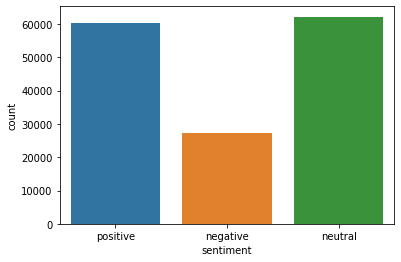

In [ ]:
import seaborn as sns
sns.countplot(df['sentiment'])

In [ ]:
df['sentiment'].value_counts()

neutral     75085
positive    43943
negative    11211
Name: sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


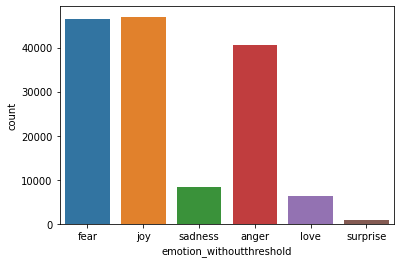

In [ ]:
sns.countplot(df['emotion_withoutthreshold'])

In [ ]:
df['emotion_withthreshold'].value_counts()

love       125023
joy          2773
sadness      1318
anger         732
fear          317
neutral        76
Name: emotion_withthreshold, dtype: int64

In [ ]:
    df =pd.read_csv(path,dtype='string')
df['emotion_withoutthreshold'].value_counts()

joy         46996
fear        46508
anger       40701
sadness      8383
love         6437
surprise      934
Name: emotion_withoutthreshold, dtype: int64

In [ ]:
df.loc[df['emotion']=='sadness']

,tweet_id,text,clean_text,author_id,description,clean_description,sentiment,emotion
7,1446707031277125632,London TiptonÃ¢ÂÂ¦ Paris HiltonÃ¢ÂÂ¦\nDamn n...,london tipton paris hilton damn never realized...,1282579332263604224,darling the moon is still the moon in all its ...,darling moon still moon phases,negative,sadness
46,1446666811869650944,RT @KarenHugersWig: Paris Hilton built a caree...,paris hilton built career playing dumb blonde ...,823335538392465408,Welcome to the official page of Writers' Vlogs...,welcome official page writers vlogs hope enjoy...,positive,sadness
49,1446659833248243716,@model8197 Paris HiltonÃ¢ÂÂs event is the wo...,paris hilton event worst sorry sorry,1269366811436421122,Nirvana Fan and Artist,nirvana fan artist,negative,sadness
80,1446635945789476871,RT @KarenHugersWig: Paris Hilton built a caree...,paris hilton built career playing dumb blonde ...,1303733809578377220,Tiktok- comfortmua,tiktok comfortmua,positive,sadness
107,1446607433376411654,wait am i dumb or is pariston hill from hxh li...,wait dumb pariston hill hxh like play paris hi...,1410305733539794950,not a safe space for shinnies,safe space shinnies,negative,sadness
...,...,...,...,...,...,...,...,...
121542,1378124627692621828,"Paris Hilton, Nikki Rothschild sister endorsed...",paris hilton nikki rothschild sister endorsed ...,1169362639018967041,redirect,redirect,negative,sadness
121546,1378124199865286660,Bad feeling\n\nEvery chart looks breakout-bull...,bad feeling every chalooks breakout bullish ev...,1366499240890028035,#Hexican #Pulsican #Dulsepoger Ã°ÂÂÂ£ #5555 ...,hexican pulsican dulsepoger club hex pulsedoge...,negative,sadness
121584,1378121018246623235,@michael_saylor @ParisHilton The tipping point...,tipping point crpto ultimate fomo really dumb ...,1123749570373140486,Comics | Crypto investing | General Asshattery,comics crypto investing general asshattery,negative,sadness
121716,1378115486915780608,@Jason Lol you were beaten by Paris Hilton. On...,lol beaten paris hilton one day look back chuckle,762305868,"Specs / Commodities / Crypto. Mostly ASX, Most...",specs commodities crypto mostly asx mostly lt ...,neutral,sadness


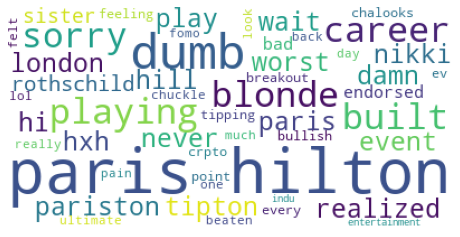

In [ ]:
import wordcloud
wc = wordcloud.WordCloud( background_color='white',    max_words=50 ,     max_font_size=70  )
wc = wc.generate(str(  df.loc[df['emotion']=='sadness']['clean_text'] ))
fig = plt.figure(figsize=(8, 8),num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [ ]:
df['clean_text'][2]

'gaga justin etc dreadlocks jesy dragged said trying black tan'

In [ ]:

df.loc[df['emotion']=='joy']

,tweet_id,text,clean_text,author_id,description,clean_description,sentiment,emotion
1,1446713997466558466,@saysatheesh Anyone having basic idea on finan...,anyone basic idea finance management tweet exp...,144051797,Common Man....\n\nRTs are not endorsements. Vi...,common man rts endorsements views personal beh...,positive,joy
2,1446713960347099136,"RT @darkminaj2: @price0fwoke Gaga , justin ,.....",gaga justin etc dreadlocks jesy dragged said t...,1271787742138163201,"2 many fags, 2 many bitches",many fags many bitches,negative,joy
8,1446706694726189058,ASU has nice unis. They're not like Paris Hil...,asu nice unis like paris hilton level sexy lik...,233371379,Human being.,human,positive,joy
14,1446699480196124672,at that era it was paris hilton white alright ...,era paris hilton white alright woman ahead time,1258643110327840775,i just be saying anything here,saying anything,neutral,joy
16,1446692218559995904,@trevo42 He is! Jerry is literally the worst a...,jerry literally worst actor ever made seen hou...,6418452,"Formerly Time Out, StyleHaul, Fullscreen, Hear...",formerly time stylehaul fullscreen hearst curr...,negative,joy
...,...,...,...,...,...,...,...,...
121823,1378098575805186062,RT @DrBitcoinMD: Paris Hilton and Teletubbies ...,paris hilton teletubbies endorsements would bi...,708428873537622016,"Started in crypto in 2017, \nCurrently working...",started crypto currently working spreading ope...,positive,joy
121824,1378098459035713538,RT @LayahHeilpern: Which bitcoin podcast is Pa...,bitcoin podcast paris hilton first,1228639526417051648,ItÃ¢ÂÂs all about that #bitcoin!,bitcoin,positive,joy
121825,1378098444745781251,"RT @ErikVoorhees: ""The year is 2021, Dogecoin ...",year 2021 dogecoin worth 7 billion tesla bough...,818812069944377345,IoT&Blockchain adaptor/Entrepeneur,iotblockchain adaptorentrepeneur,positive,joy
121826,1378098415427522565,Paris Hilton and Teletubbies endorsements woul...,paris hilton teletubbies endorsements would bi...,866982591114731523,board certified orange pill dealer,board certified orange pill dealer,positive,joy


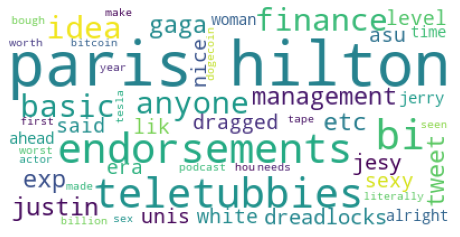

In [ ]:
import wordcloud
wc = wordcloud.WordCloud( background_color='white',    max_words=50 ,     max_font_size=70  )
wc = wc.generate(str(  df.loc[df['emotion']=='joy']['clean_text'] ))
fig = plt.figure(figsize=(8, 8),num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [ ]:
emotion=[]
for i in range(len(emotion_proba)):
    maxx=np.argmax(emotion_proba[i])
    if emotion_proba[i][maxx] < 0.5 :
      emotion.append('neutral')
    else :
      emotion.append(label[maxx])

#save the prediction in the data frame
df['emotion']=emotion


In [ ]:
df['sentiment'].value_counts()

neutral     62202
positive    60399
negative    27358
Name: sentiment, dtype: int64

In [ ]:
df['emotion'].value_counts()

neutral     116401
joy          27576
sadness       2919
love          1011
anger          912
surprise       646
fear           494
Name: emotion, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


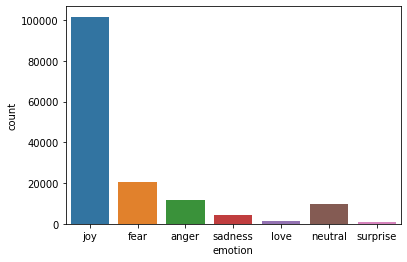

In [ ]:
import seaborn as sns
sns.countplot(df.emotion)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


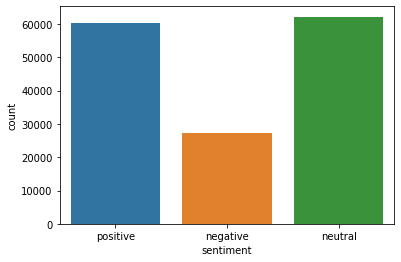

In [ ]:
sns.countplot(df.sentiment)

In [ ]:
df['emotion'].value_counts()

joy         93776
anger       17109
sadness      5355
fear         1833
love         1694
surprise      341
Name: emotion, dtype: int64

In [ ]:
df['sentiment'].value_counts()

neutral     73324
positive    35734
negative    11050
Name: sentiment, dtype: int64

In [ ]:
df['emotion'].value_counts()

joy         36518
anger        3681
sadness      3303
love         1671
fear         1278
surprise      333
Name: emotion, dtype: int64

In [ ]:
df['sentiment'].value_counts()

positive    35734
negative    11050
Name: sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


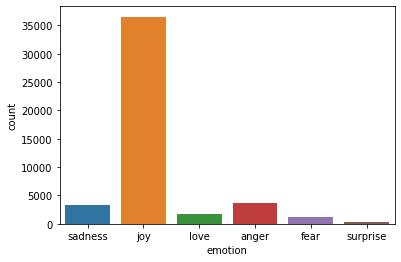

In [ ]:
import seaborn as sns
sns.countplot(df.emotion)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


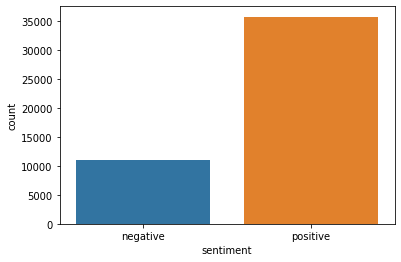

In [ ]:
sns.countplot(df.sentiment)